In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=37239e8328ec07304a5d67d88f7314dcd63b08133920d3f97aa048bf5d1f3e06
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


KHỞI TẠO SPARK SESSION

In [3]:
from pyspark.sql import SparkSession
# Create a Spark session
spark = SparkSession.builder.appName("Visualize data").getOrCreate()

ĐỌC FILE CSV, KIỂM TRA CẤU TRÚC FILE

In [4]:
df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("Clean_Dataset.csv")
df.cache()
df.count()

218248

LOẠI BỎ CỘT KHÔNG CẦN THIẾT LÀ "C_0" (cột đánh chỉ số index)

In [5]:
df = df.drop("_c0")

KIỂM TRA LẠI CẤU TRÚC DATAFRAME

In [6]:
df.printSchema()

root
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [7]:
df.show()

+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|price|
+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|
| SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5953|
|  AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1| 5956|
|  Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1| 5955|
|  Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5955|
|  Vistara| UK-945|      Delhi|       Morning| zero|    Afternoo

KIỂM TRA KIỂU DỮ LIỆU CỦA TỪNG THUỘC TÍNH

In [8]:
df.dtypes

[('airline', 'string'),
 ('flight', 'string'),
 ('source_city', 'string'),
 ('departure_time', 'string'),
 ('stops', 'string'),
 ('arrival_time', 'string'),
 ('destination_city', 'string'),
 ('class', 'string'),
 ('duration', 'double'),
 ('days_left', 'int'),
 ('price', 'int')]

HIỂN THỊ THỐNG KÊ TỪNG THUỘC TÍNH

In [9]:
df.describe().show()

+-------+-------+--------------------+-----------+--------------+------+------------+----------------+--------+------------------+------------------+------------------+
|summary|airline|              flight|source_city|departure_time| stops|arrival_time|destination_city|   class|          duration|         days_left|             price|
+-------+-------+--------------------+-----------+--------------+------+------------+----------------+--------+------------------+------------------+------------------+
|  count| 218248|              218248|     218248|        218248|218248|      218248|          218248|  218248|            218248|            218248|            218248|
|   mean|   NULL|5.427411873908628...|       NULL|          NULL|  NULL|        NULL|            NULL|    NULL|11.591059482790643|26.022222425864154| 8786.083180601883|
| stddev|   NULL|1.803651814074487...|       NULL|          NULL|  NULL|        NULL|            NULL|    NULL| 7.267077996171816|13.521175228304557|10482.

LOẠI BỎ CÁC GIÁ TRỊ NULL

In [10]:
df = df.dropna()
df.count()

218248

SỬ DỤNG STRING INDEXER ĐỂ ÁNH XẠ LẠI CÁC THUỘC TÍNH THÀNH KIỂU SỐ NGUYÊN (INT)

In [11]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

# Convert "airline", "flight", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class" column to numerical labels
indexer = StringIndexer(inputCols=["airline", "flight", "source_city", "departure_time", "stops",
                                   "arrival_time", "destination_city", "class"],
                        outputCols=["Airline", "Flight", "Source_city",
                                    "Departure_time", "Stops", "Arrival_time",
                                    "Destination_city", "Class"])
model = indexer.fit(df)
df_indexed = model.transform(df)

# Display the resulting DataFrame
df_indexed.show()

+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|Airline|Flight|Source_city|Departure_time|Stops|Arrival_time|Destination_city|Class|duration|days_left|price|
+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|    5.0| 441.0|        0.0|           2.0|  1.0|         0.0|             0.0|  0.0|    2.17|        1| 5953|
|    5.0| 449.0|        0.0|           1.0|  1.0|         2.0|             0.0|  0.0|    2.33|        1| 5953|
|    4.0| 557.0|        0.0|           1.0|  1.0|         5.0|             0.0|  0.0|    2.17|        1| 5956|
|    0.0|  35.0|        0.0|           0.0|  1.0|         3.0|             0.0|  0.0|    2.25|        1| 5955|
|    0.0|  41.0|        0.0|           0.0|  1.0|         2.0|             0.0|  0.0|    2.33|        1| 5955|
|    0.0|  50.0|        0.0|           0.0|  1.0|         3.0|             0.0|  0.0|    2.33|        1| 5955|
|

TRỰC QUAN HÓA DATAFRAME

In [12]:
import matplotlib.pyplot as plt

THỐNG KÊ CÁC CỘT THUỘC TÍNH THÀNH TỪNG BIỂU ĐỒ

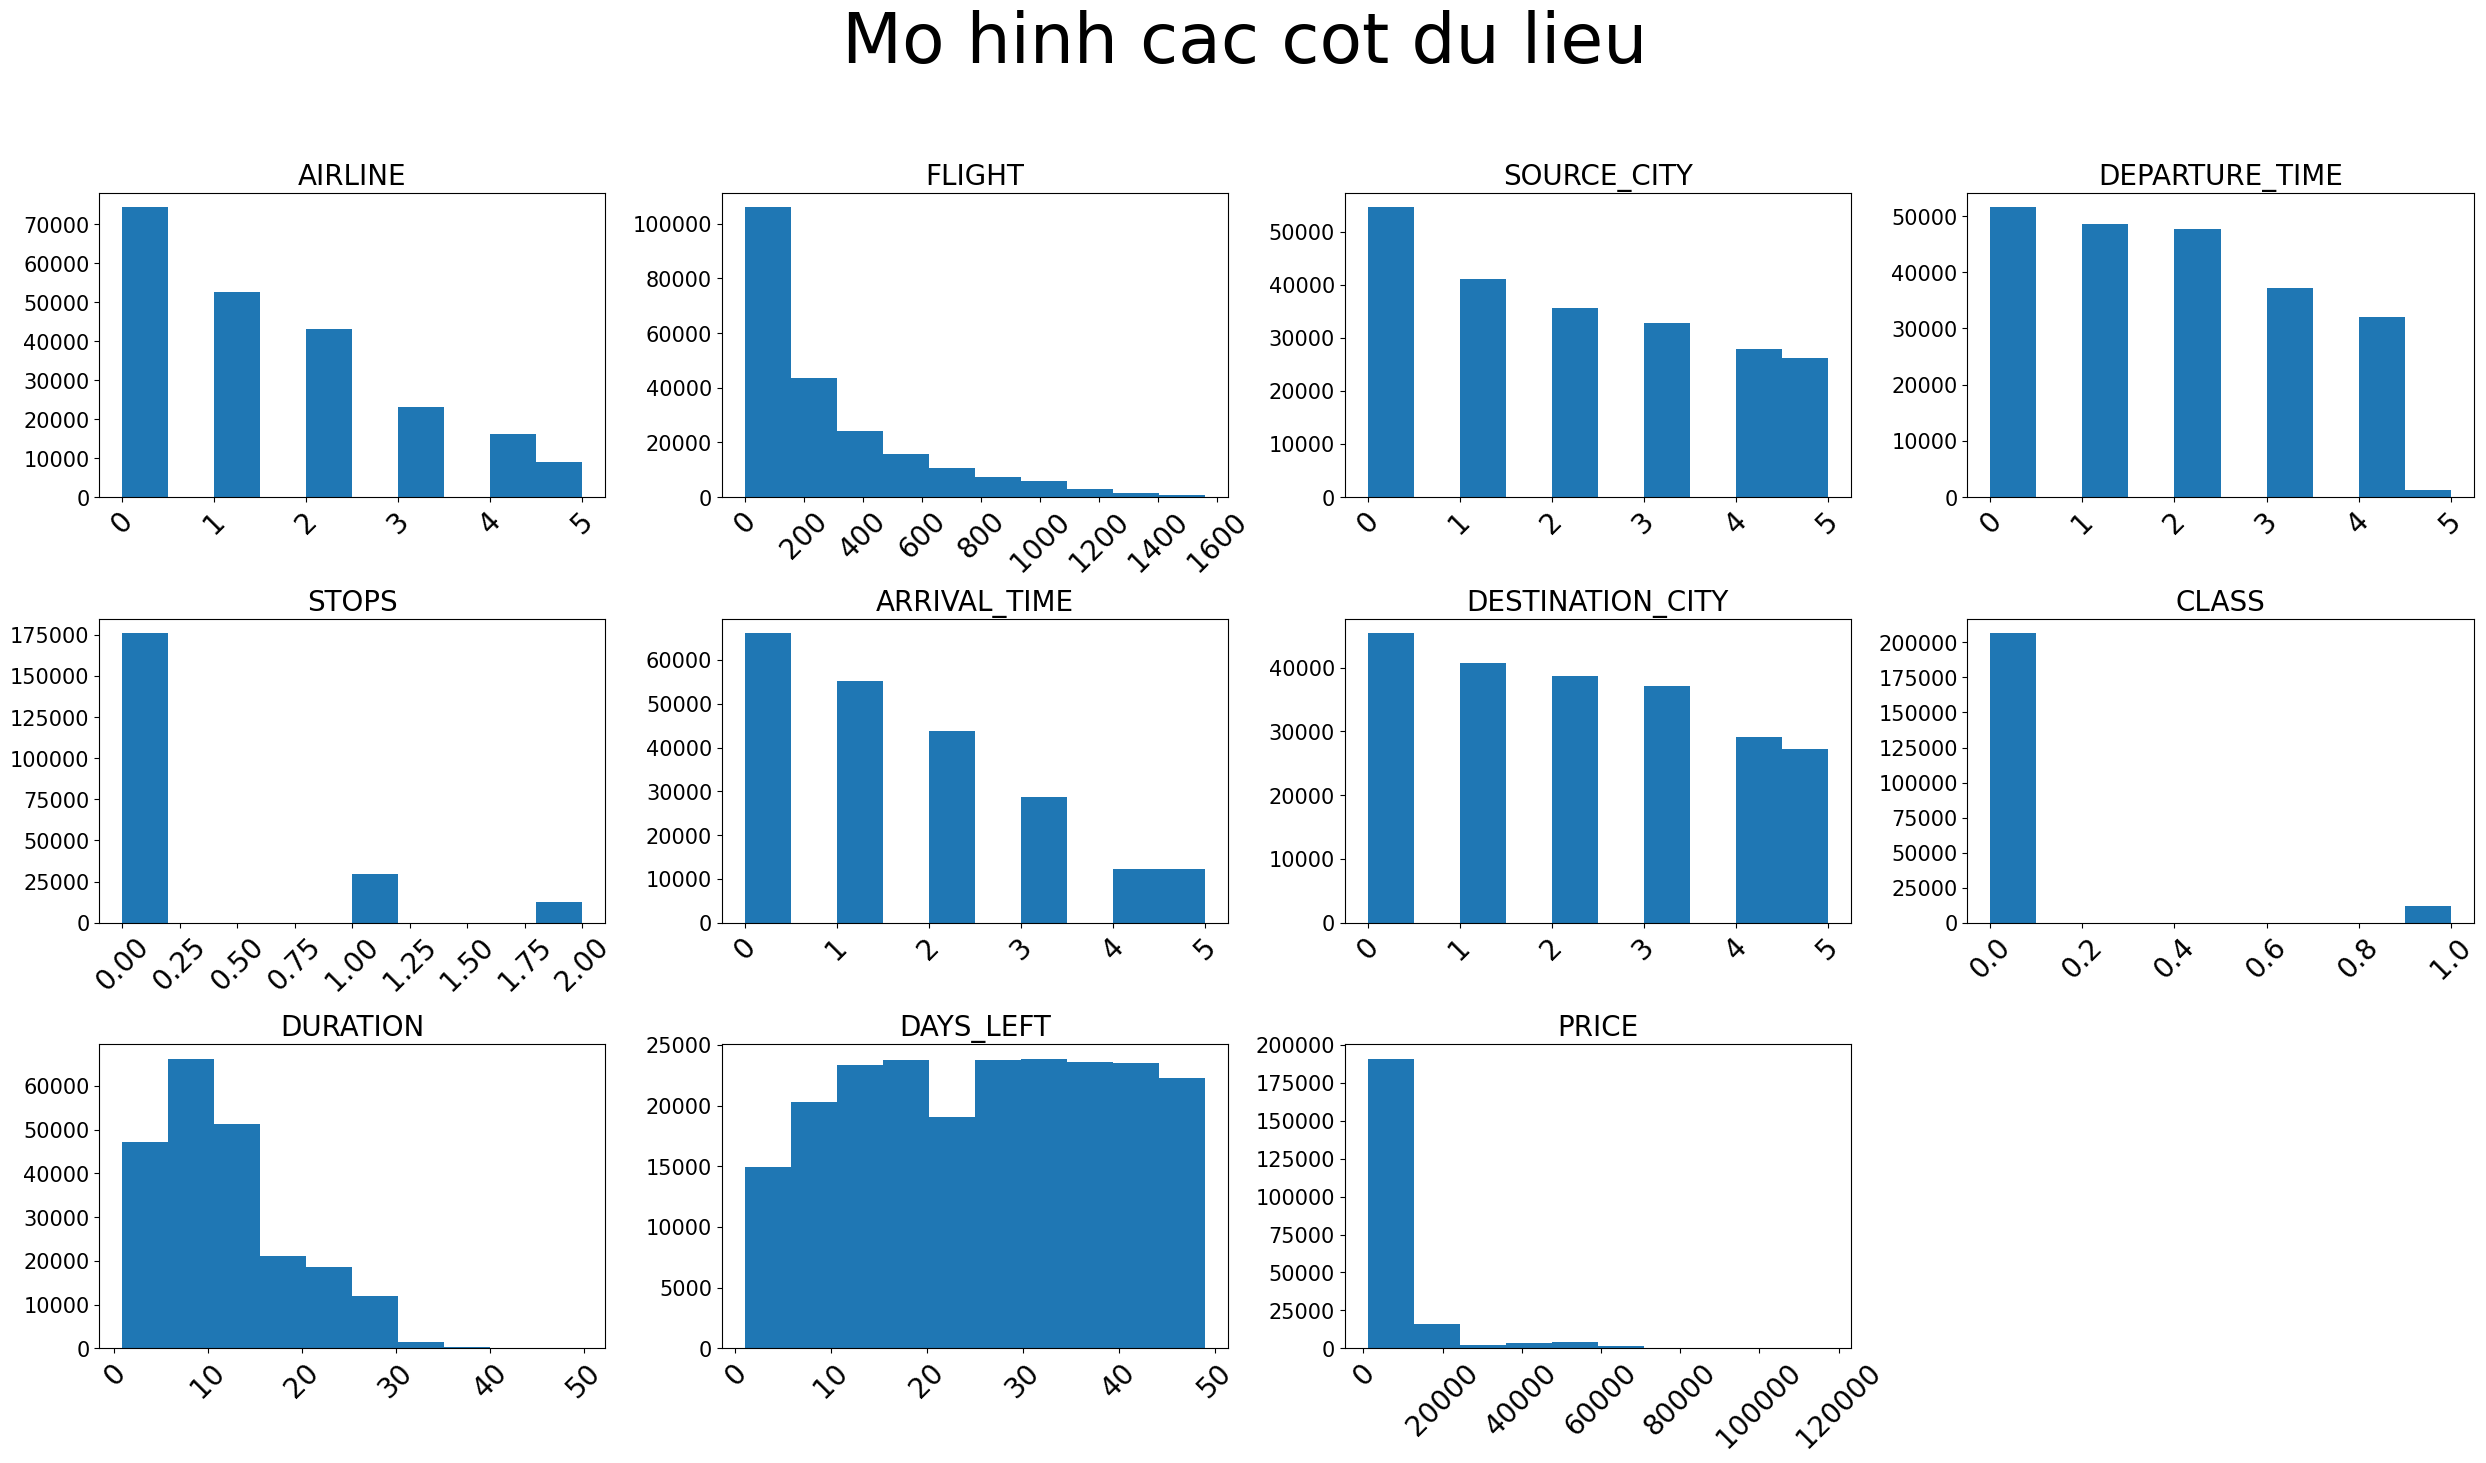

In [13]:
fig = plt.figure(figsize=(25,15))
st = fig.suptitle("Mo hinh cac cot du lieu", fontsize=50, verticalalignment="center")
for col, num in zip(df_indexed.toPandas().describe().columns, range(1,12)):
    ax = fig.add_subplot(3, 4, num)
    ax.hist(df_indexed.toPandas()[col])
    plt.grid(False)
    plt.xticks(rotation = 45, fontsize = 20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

GIẢI THÍCH
1.   Chart thuộc tính Airline: thể hiện số lượng chuyến bay của các hãng hàng không. Có 6 hãng (đánh số từ 0 đến 5)
  -	Hãng 0: Vistara – có tần suất các chuyến bay cao nhất (được nhiều hành khách lựa chọn)
  - Hãng 1: Air_India – tần suất các chuyến bay cao hơn 1 nửa hãng Vistara
  - Hãng 2: Indigo – tần suất các chuyến bay thấp hơn 1 nửa so với hãng 1
  - Hãng 3: GO_FIRST – tần suất các chuyến bay thấp hơn 1 nửa so với hãng thứ 2
  - Hãng 4: Air asia – tần suất các chuyến bay thấp
  - Hãng 5: SpiceJet – tần suất các chuyến bay thấp
> Mức độ phổ biến của các hãng hàng không sẽ góp phần ảnh hưởng đến giá vé máy bay
2.   Chart thuộc tính Flight: thể hiện sự phân bố số lượng chuyến bay theo khoảng cách địa lý hoặc thời gian bay
  - Cột đầu tiên (0-200 theo trục y) là cao nhất, cho thấy phần lớn các chuyến bay có khoảng cách bay rất ngắn, cho thấy tần suất di chuyển trong khoảng đường ngắn của hành khách tương đối lớn
  - Các cột tiếp theo giảm dần khi khoảng cách hoặc thời gian bay tăng lên, cho thấy số lượng các chuyến bay đường dài giảm dần
3.   Chart thuộc tính Source_city: thể hiện sự phân bố số lượng chuyến bay theo từng thành phố khác nhau. Sự phân bố này có thể phản ánh các yếu tố như dân số, nhu cầu di chuyển, và cơ sở hạ tầng hàng không của mỗi thành phố. Thành phố 0 (Delhi có số lượng chuyến bay cao nhất).
4.   Chart thuộc tính Departure_time (thời gian khởi hành): thể hiện sự phân bố các chuyến bay theo thời gian khởi hành trong ngày – phản ánh thói quen và nhu cầu di chuyển của hành khách
  - Khoảng thời gian 0 (morning 6h – 9h) có số lượng chuyến bay cao nhất. Có thể thể hiện xu hướng của hành khách muốn bay vào đầu ngày để đến nơi sớm.
  - Số lượng chuyến bay ít dần vào buổi tối và đêm khuya, có thể do hạn chế về giờ bay của các sân bay hoặc thời gian không thuận tiện cho hành khách.

5.   Chart thuộc tính Stops: thể hiện số lượng chuyến bay quá cảnh (chuyến bay đường dài). Cột 0 (chuyến bay thẳng, không quá cảnh) là cao nhất, cho thấy nhu cầu hành khách muốn bay trực tiếp đến điểm dừng mà không phải quá cảnh (có thể do tiết kiệm thời gian, giá vé thấp). Các chuyến bay có 2 lần quá cảnh trở lên hầu như không phổ biến
6.   Chart thuộc tính Arrival_time: thể hiện số lượng chuyến bay theo thời gian đến nơi trong ngày. phần lớn các chuyến bay đến nơi vào buổi sáng và buổi trưa, trong khi số lượng chuyến bay giảm dần vào buổi tối và giảm mạnh hơn vào khoảng thời gian ít phổ biến như đêm khuya và sáng sớm. Từ đó phản ánh thói quen và nhu cầu của hành khách.
7.   Chart thuộc tính Destination_city: thể hiện số lượng chuyến bay đến các thành phố khác nhau. Phần lớn các thành phố có lượng chuyến bay đến khá đồng đều, chênh lệch không đáng kể.
8.   Chart thuộc tính Class: thể hiện số lượng chuyến bay theo hạng vé. Phần lớn các chuyến bay là hạng phổ thông (0.0), trong khi số lượng chuyến bay ở hạng thương gia hoặc hạng nhất (1.0) ít hơn rất nhiều. Sự phân bố này phản ánh thói quen di chuyển của hành khách, với đa số chọn hạng phổ thông vì chi phí hợp lý hơn, và chỉ một nhóm nhỏ khách hàng chọn hạng thương gia hoặc hạng nhất do nhu cầu dịch vụ cao cấp và khả năng chi trả cao hơn.
9.   Chart thuộc tính Duration: thể hiện thời lượng bay của các chuyến bay. Hầu hết các chuyến bay có thời gian bay ngắn, dưới 10 giờ, có thể là các chuyến bay nội địa hoặc các chuyến bay quốc tế ngắn. Các chuyến bay có thời gian bay dài hơn, từ 10 đến 20 giờ, có thể là các chuyến bay quốc tế liên lục địa. Rất ít chuyến bay có thời gian bay vượt quá 20 giờ.
10.   Chart thuộc tính Days_left: cho thấy hành khách đặt vé trong nhiều khoảng thời gian khác nhau (phân bố tương đối đồng đều trong khoảng 30 đến 50 ngày), nhưng số lượng vé đặt giảm dần khi số ngày còn lại đến ngày khởi hành tăng.
11.   Chart thuộc tính Price: thể hiện phân bố các chuyến bay theo giá vé.
  - Hầu hết các chuyến bay có giá vé dưới 20,000 đơn vị tiền tệ, phản ánh phần lớn hành khách chọn các chuyến bay có giá vé phải chăng.
  - Một số chuyến bay có giá vé cao hơn, từ 20,000 đến 40,000 đơn vị tiền tệ, có thể là hạng vé cao cấp hoặc các chuyến bay đường dài.
  - Rất ít chuyến bay có giá vé vượt quá 40,000 đơn vị tiền tệ, có thể là các chuyến bay hạng nhất hoặc các chuyến bay đặc biệt.




THỐNG KÊ GIÁ VÉ THEO HẠNG BAY

In [14]:
from pyspark.sql.functions import mean, max, min, stddev, count

In [15]:
result_class = df.groupBy('class').agg(
    mean('price').alias('mean'), # giá vé trung bình
    max('price').alias('max'), # giá vé cao nhất
    min('price').alias('min'), # giá vé thấp nhất
    stddev('price').alias('std'), #Độ lệch chuẩn của giá vé, phản ánh mức độ biến động của giá vé.
    count('price').alias('count') #Số lượng chuyến bay của từng loại vé
)

# Hiển thị kết quả
result_class.show()

+--------+-----------------+------+-----+-----------------+------+
|   class|             mean|   max|  min|              std| count|
+--------+-----------------+------+-----+-----------------+------+
| Economy|6572.342383362527| 42349| 1105|3743.519517375189|206666|
|Business|48287.46080124331|117307|22152|13145.99740896433| 11582|
+--------+-----------------+------+-----+-----------------+------+



Nhận xét bảng dữ liệu:
- Giá vé trung bình: Giá vé trung bình của hạng Business (52,540) cao hơn nhiều so với hạng Economy (6,572) vì vé hạng Business thường đi kèm với các dịch vụ cao cấp hơn.
- Sự biến động của giá vé: Độ lệch chuẩn của giá vé Business (12,969) cao hơn so với hạng Economy (3,743) nghĩa là giá vé hạng Business có mức độ biến động lớn hơn.
- Số lượng chuyến bay: Số lượng chuyến bay Economy (206,666) nhiều hơn gấp đôi so với số lượng chuyến bay Business (93,487) cho thấy nhu cầu cho vé hạng Economy cao hơn nhiều so với vé hạng Business.

VẼ BIỂU ĐỒ SO SÁNH TỈ LỆ GIỮA HẠNG VÉ BUSINESS VÀ ECONOMY

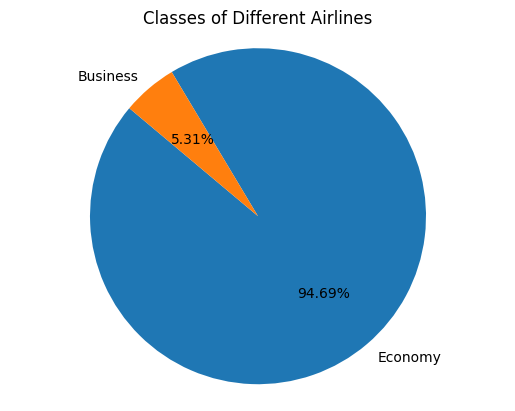

In [16]:
result = result_class.toPandas()

# Vẽ biểu đồ tròn cho cột 'mean'
plt.pie(result['count'], labels=result['class'], autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title("Classes of Different Airlines")
plt.show()

NHẬN XÉT BIỂU ĐỒ:
- Phần màu cam (Economy): Chiếm 94,69% tổng số chuyến bay, phản ánh phần lớn hành khách lựa chọn vé hạng Economy.
- Phần màu xanh (Business): Chiếm 5,31% tổng số chuyến bay, ít hơn rất nhiều so với Economy.

THỐNG KÊ GIÁ VÉ THEO HÃNG MÁY BAY

In [17]:
airline = df.groupBy('airline').agg( #Tên hãng hàng không.
    mean('price').alias('mean'), #Giá vé trung bình.
    max('price').alias('max'), # Giá vé cao nhất.
    min('price').alias('min'), # Giá vé thấp nhất.
    stddev('price').alias('std'), # Độ lệch chuẩn của giá vé, phản ánh mức độ biến động của giá vé.
    count('price').alias('count') #Số lượng chuyến bay của từng hãng hàng không.
)

# Hiển thị kết quả
airline.show()

+---------+------------------+------+----+------------------+-----+
|  airline|              mean|   max| min|               std|count|
+---------+------------------+------+----+------------------+-----+
|   Indigo| 5324.216303339517| 31952|1105|3268.8948311101817|43120|
| SpiceJet| 6179.278881367218| 34158|1106| 2999.630406204382| 9011|
|Air_India|10399.870636550308| 83460|1526|11119.333512367153|52596|
|  AirAsia|4091.0727419555224| 31917|1105| 2824.055171793368|16098|
| GO_FIRST| 5652.007595045959| 32803|1105|2513.8655600950506|23173|
|  Vistara|11965.787690235691|117307|1714|14029.809556794098|74250|
+---------+------------------+------+----+------------------+-----+



GIẢI THÍCH
1.   Phân bố giá vé trung bình:
  - Hãng Vistara có giá vé trung bình cao nhất (11.965), điều này có thể do hãng cung cấp nhiều dịch vụ cao cấp hoặc các tuyến bay dài hơn.
  - Hãng Air_India có giá vé trung bình cao thứ hai (10.399), phản ánh có thể hãng này cũng phục vụ nhiều chuyến bay dài và dịch vụ cao cấp.
  - Các hãng như Indigo, SpiceJet, AirAsia, và GO_FIRST có giá vé trung bình thấp hơn (dưới 7,000), cho thấy đây có thể là các hãng hàng không giá rẻ hoặc phục vụ các tuyến bay ngắn hơn.
2.   Độ lệch chuẩn (std):
  - Độ lệch chuẩn của giá vé của Vistara (14.029) và Air_India (11.119) rất cao, cho thấy sự biến động lớn trong giá vé của các hãng này.
  - Độ lệch chuẩn của các hãng còn lại thấp hơn, dao động từ 2,513 đến 3,268, cho thấy giá vé của các hãng này ổn định hơn.
3.   Số lượng chuyến bay (count):
  - Vistara có số lượng chuyến bay nhiều nhất (74,2509), tiếp theo là Indigo (43,120) và AirAsia (16,098).
  - Air_India và SpiceJet có số lượng chuyến bay ít hơn, lần lượt là 16,098 và 9,011.

VẼ BIỂU ĐỒ SO SÁNH GIÁ VÉ GIỮA CÁC HÃNG MÁY BAY

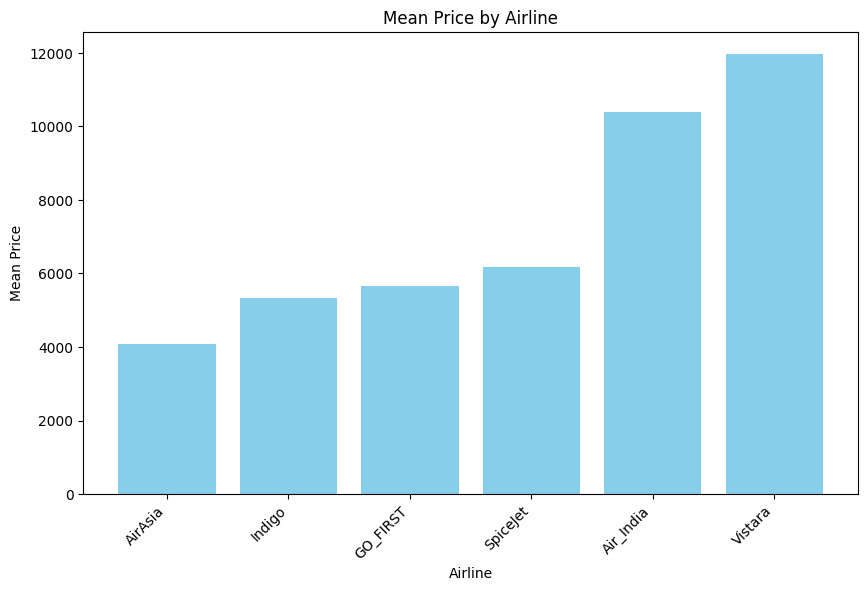

In [18]:
result_airline = airline.toPandas()

# Sắp xếp theo cột 'mean' để có biểu đồ được sắp xếp
result_airline = result_airline.sort_values(by='mean', ascending=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(result_airline['airline'], result_airline['mean'], color='skyblue')
plt.title('Mean Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.show()

GIẢI THÍCH
1.   Trục hoành (x-axis): Biểu diễn tên các hãng hàng không (Indigo, SpiceJet, Air_India, AirAsia, GO_FIRST, Vistara).
2.   Trục tung (y-axis):Biểu diễn giá vé trung bình, với đơn vị là giá vé (có thể là USD hoặc đơn vị tiền tệ khác).
3.   Các cột biểu đồ cho thấy giá vé trung bình của mỗi hãng hàng không.
Hãng Vistara có giá vé trung bình cao nhất, gần 12000 đơn vị tiền tệ.
Hãng Air_India có giá vé trung bình cao thứ hai, khoảng 10500 đơn vị tiền tệ.
Các hãng khác như Indigo, SpiceJet, AirAsia, và GO_FIRST có giá vé trung bình thấp hơn đáng kể, dao động từ khoảng 4000 đến 6200 đơn vị tiền tệ.


THỐNG KÊ GIÁ VÉ THEO CHUYẾN BAY

In [19]:
flight = df.groupBy('flight').agg( #Mã chuyến bay.
    mean('price').alias('mean'), # Giá vé trung bình cho mỗi chuyến bay.
    max('price').alias('max'), # Giá vé cao nhất cho mỗi chuyến bay.
    min('price').alias('min'), # Giá vé thấp nhất cho mỗi chuyến bay.
    stddev('price').alias('std'), # Độ lệch chuẩn của giá vé cho mỗi chuyến bay, thể hiện mức độ phân tán của giá vé so với giá vé trung bình.
    count('price').alias('count') # Số lượng vé đã được thống kê cho mỗi chuyến bay.
)

# Hiển thị kết quả
flight.show()

+-------+------------------+-----+-----+------------------+-----+
| flight|              mean|  max|  min|               std|count|
+-------+------------------+-----+-----+------------------+-----+
|6E-5037|            2482.0| 2482| 2482|               0.0|    5|
|G8-2506|            4455.0| 4455| 4455|               0.0|    4|
| AI-501|  8812.27079303675|28174| 4071|3739.4846601407844|  517|
|SG-3725|            7823.4| 8799| 7173| 685.6506399034423|    5|
| AI-781| 6001.363636363636|11844| 5093|  2112.67774507743|   11|
|6E-2914|           19500.0|19500|19500|              NULL|    1|
|SG-8721|  6016.78640776699|22125| 3884| 2703.104104001237|  103|
| 6E-483|4548.4390243902435| 6585| 3999| 904.3603277671046|   41|
|SG-1092|5174.7692307692305| 5943| 2614|  1459.86307313655|   13|
| G8-384|           3754.25| 4784| 3574|383.49922958320144|   12|
| SG-198| 5401.145833333333| 7803| 4500|1305.6102345888382|   48|
|6E-2901|14355.166666666666|19500| 9840|3311.9200725057763|    6|
|SG-6027| 

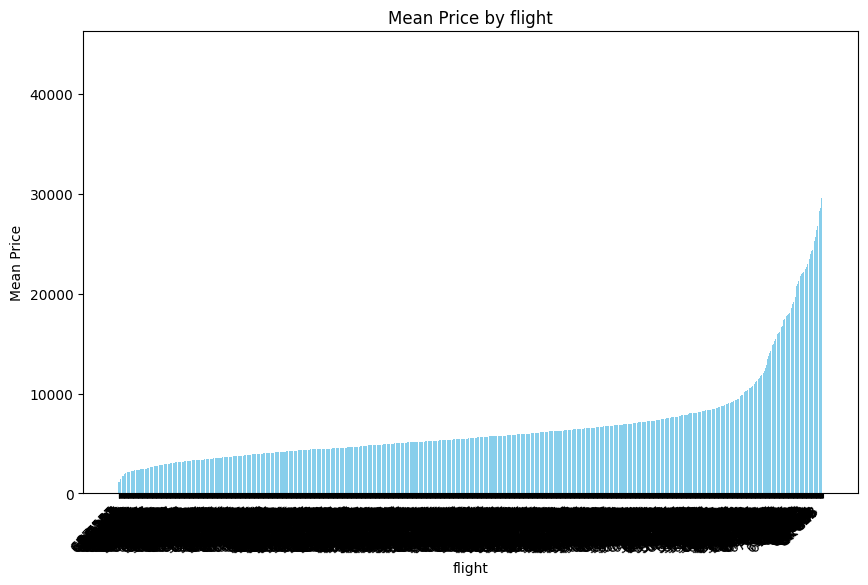

In [20]:
# Chuyển đổi DataFrame PySpark thành DataFrame pandas
result_flight = flight.toPandas()

# Sắp xếp theo cột 'mean' để có biểu đồ được sắp xếp
result_flight = result_flight.sort_values(by='mean', ascending=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(result_flight['flight'], result_flight['mean'], color='skyblue')
plt.title('Mean Price by flight')
plt.xlabel('flight')
plt.ylabel('Mean Price')
plt.xticks(rotation=45, ha='right')
plt.show()

GIẢI THÍCH
- Trục hoành (X): Đại diện cho các chuyến bay với mã chuyến bay được ghi dưới các cột. Các chuyến bay được sắp xếp theo thứ tự tăng dần của giá vé trung bình.
- Trục tung (Y): Đại diện cho giá vé trung bình (Mean Price) của các chuyến bay.
- Các cột màu xanh dương (skyblue): Biểu diễn giá vé trung bình của từng chuyến bay.
- Biểu đồ cho thấy sự phân phối giá vé trung bình của các chuyến bay, từ thấp nhất đến cao nhất.
- Các cột thấp ở phía bên trái biểu đồ cho thấy những chuyến bay có giá vé trung bình thấp.
- Các cột cao ở phía bên phải biểu đồ biểu thị những chuyến bay có giá vé trung bình cao.
- Biểu đồ giúp dễ dàng nhận ra sự khác biệt lớn về giá vé trung bình giữa các chuyến bay.